# TFM

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, 
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

## Ejecución de código en GPU

In [2]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [3]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_data = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_data}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [4]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21537,22",-6115,"6934,98","22357,2","22323,21","-33,99","58,25",0
1,2,"22323,21",-6235,"6835,24","22923,45","22857,5","-65,95","-96,25",0
2,3,"22857,5",-5960,"6243,59","23141,09","23173,35","32,26","-71,66",0
3,4,"23173,35",-6255,"5766,69","22685,04","22615,78","-69,26","-165,64",0
4,5,"22615,78",-6240,"4992,05","21367,83","21414,88","47,05","-164,13",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"13547,63",-5875,"5775,07","13447,7","13431,47","-16,23","-109,23",1
1496,1497,"13431,47",-6155,"6056,93","13333,4","13336,72","3,32","-2,17",1
1497,1498,"13336,72",-6140,"4338,88","11535,6","11526,05","-9,55","-23,09",1
1498,1499,"11526,05",-5820,"4571,67","10277,72","10257,24","-20,48","-21,29",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18178,15","-6170,0","3995,65","16003,8","16025,09","21,29","142,3",0
1,2,"16025,09","-6005,0","8923,28","18943,37","18987,62","44,25","119,72",0
2,3,"18987,62","-6135,0","6952,82","19805,44","19864,38","58,94","230,5",0
3,4,"19864,38","-5900,0","3997,83","17962,21","17952,05","-10,16","148,97",0
4,5,"17952,05","-6070,0","8441,48","20323,53","20281,57","-41,96","62,56",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"6,26","-0,0","0,0","6,26","7,88","1,62","1,2",1
1496,1497,"7,88","-0,0","0,0","7,88","9,77","1,89","0,38",1
1497,1498,"9,77","-0,0","0,0","9,77","8,55","-1,22","-6,43",1
1498,1499,"8,55","-0,0","0,0","8,55","13,11","4,56","-4,05",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21209,42","-6140,0","7995,99","23065,41","23138,01","72,6","197,33",0
1,2,"23138,01","-5840,0","7394,86","24692,87","24712,57","19,7","224,36",0
2,3,"24712,57","-5890,0","5200,87","24023,44","24048,74","25,3","234,03",0
3,4,"24048,74","-6240,0","3152,75","20961,49","20935,44","-26,05","271,25",0
4,5,"20935,44","-6425,0","9501,42","24011,86","24160,01","148,15","331,41",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"6,65","-0,0","0,0","6,65","9,14","2,49","-0,79",1
1496,1497,"9,14","-0,0","0,0","9,14","6,47","-2,67","-2,66",1
1497,1498,"6,47","-0,0","0,0","6,47","3,42","-3,05","2,65",1
1498,1499,"3,42","-0,0","0,0","3,42","14,72","11,3","-3,35",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"13644,48","-5860,0","6926,42","14710,9","14784,81","73,91","-27,28",0
1,2,"14784,81","-5905,0","6956,78","15836,59","15864,01","27,42","36,18",0
2,3,"15864,01","-6430,0","7941,81","17375,82","17438,23","62,41","106,47",0
3,4,"17438,23","-6065,0","8541,77","19915,0","19954,35","39,35","182,72",0
4,5,"19954,35","-5910,0","4459,38","18503,73","18480,06","-23,67","203,71",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"7,27","-0,0","0,0","7,27","5,98","-1,29","2,62",1
1496,1497,"5,98","-0,0","0,0","5,98","2,82","-3,16","-3,25",1
1497,1498,"2,82","-0,0","0,0","2,82","4,52","1,7","-3,45",1
1498,1499,"4,52","-0,0","0,0","4,52","4,32","-0,2","2,6",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19140,58","-6010,0","7999,76","21130,34","21141,04","10,7","164,4",0
1,2,"21141,04","-6035,0","7036,86","22142,9","22090,26","-52,64","57,83",0
2,3,"22090,26","-6595,0","7014,79","22510,05","22465,58","-44,47","57,28",0
3,4,"22465,58","-5905,0","6024,41","22584,99","22695,94","110,95","98,28",0
4,5,"22695,94","-5905,0","8019,45","24810,39","24752,12","-58,27","-79,45",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1,07","-0,0","0,0","1,07","2,66","1,59","-21,67",1
1496,1497,"2,66","-0,0","0,0","2,66","9,08","6,42","6,22",1
1497,1498,"9,08","-0,0","0,0","9,08","4,04","-5,04","-4,93",1
1498,1499,"4,04","-0,0","0,0","4,04","8,75","4,71","7,76",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18578,67","-6325,0","6989,6","19243,27","19251,42","8,15","109,52",0
1,2,"19251,42","-5930,0","6010,9","19332,32","19334,94","2,62","2,27",0
2,3,"19334,94","-5965,0","7956,31","21326,25","21356,2","29,95","16,75",0
3,4,"21356,2","-5815,0","5963,51","21504,71","21534,11","29,4","75,01",0
4,5,"21534,11","-5920,0","7248,97","22863,08","22868,29","5,21","43,71",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"9,37","-0,0","0,0","9,37","18,19","8,82","16,68",1
1496,1497,"18,19","-0,0","0,0","18,19","10,1","-8,09","4,69",1
1497,1498,"10,1","-0,0","0,0","10,1","1,61","-8,49","-7,7",1
1498,1499,"1,61","-0,0","0,0","1,61","1,68","0,07","-2,24",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14663,79","-5845,0","7240,36","16059,15","16038,49","-20,66","234,63",0
1,2,"16038,49","-5970,0","6565,23","16633,72","16604,22","-29,5","134,32",0
2,3,"16604,22","-6105,0","8543,15","19042,37","19130,54","88,17","261,79",0
3,4,"19130,54","-6395,0","6543,43","19278,97","19208,12","-70,85","217,95",0
4,5,"19208,12","-6290,0","8545,89","21464,01","21426,72","-37,29","132,39",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"9,86","-0,0","0,0","9,86","0,39","-9,47","-7,54",1
1496,1497,"0,39","-0,0","0,0","0,39","2,6","2,21","-11,65",1
1497,1498,"2,6","-0,0","0,0","2,6","4,37","1,77","-14,92",1
1498,1499,"4,37","-0,0","0,0","4,37","7,99","3,62","6,05",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16303,44","-5995,0","3974,58","14283,02","14322,53","39,51","379,26",0
1,2,"14322,53","-5830,0","5982,52","14475,05","14482,52","7,47","305,34",0
2,3,"14482,52","-6240,0","6744,93","14987,45","14950,19","-37,26","214,67",0
3,4,"14950,19","-5995,0","6230,51","15185,7","15230,0","44,3","278,1",0
4,5,"15230,0","-6245,0","8943,88","17928,88","17967,16","38,28","295,29",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"5,08","-0,0","0,0","5,08","3,07","-2,01","2,89",1
1496,1497,"3,07","-0,0","0,0","3,07","0,25","-2,82","-13,44",1
1497,1498,"0,25","-0,0","0,0","0,25","9,76","9,51","-3,41",1
1498,1499,"9,76","-0,0","0,0","9,76","3,3","-6,46","-16,1",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"24092,82","-6105,0","2906,45","20894,27","20927,14","32,87","164,91",0
1,2,"20927,14","-5975,0","6653,81","21605,95","21567,57","-38,38","124,55",0
2,3,"21567,57","-5730,0","6002,35","21839,92","21827,84","-12,08","117,53",0
3,4,"21827,84","-6525,0","7004,13","22306,97","22289,47","-17,5","161,59",0
4,5,"22289,47","-6040,0","6405,71","22655,18","22725,39","70,21","225,93",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"11,91","-0,0","0,0","11,91","8,25","-3,66","-9,12",1
1496,1497,"8,25","-0,0","0,0","8,25","14,66","6,41","10,4",1
1497,1498,"14,66","-0,0","0,0","14,66","9,26","-5,4","3,56",1
1498,1499,"9,26","-0,0","0,0","9,26","9,08","-0,18","-5,57",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22572,24","-5830,0","3614,28","20356,52","20292,78","-63,74","279,4",0
1,2,"20292,78","-6535,0","6975,28","20733,06","20724,68","-8,38","252,86",0
2,3,"20724,68","-6290,0","7617,44","22052,12","22093,57","41,45","215,05",0
3,4,"22093,57","-5865,0","3893,87","20122,44","20145,77","23,33","243,67",0
4,5,"20145,77","-5860,0","7018,19","21303,96","21374,03","70,07","253,41",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1,07","-0,0","0,0","1,07","3,37","2,3","-2,75",1
1496,1497,"3,37","-0,0","0,0","3,37","1,39","-1,98","-0,33",1
1497,1498,"1,39","-0,0","0,0","1,39","12,19","10,8","3,85",1
1498,1499,"12,19","-0,0","0,0","12,19","18,85","6,66","13,95",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15187,18","-6240,0","3994,07","12941,25","12975,18","33,93","-5,81",0
1,2,"12975,18","-6015,0","7944,49","14904,67","14908,52","3,85","27,54",0
2,3,"14908,52","-5955,0","7033,12","15986,64","15995,35","8,71","4,74",0
3,4,"15995,35","-6110,0","2938,34","12823,69","12889,83","66,14","27,52",0
4,5,"12889,83","-5925,0","8969,83","15934,66","15961,45","26,79","61,98",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"4,28","-0,0","0,0","4,28","2,38","-1,9","-7,53",1
1496,1497,"2,38","-0,0","0,0","2,38","11,3","8,92","7,98",1
1497,1498,"11,3","-0,0","0,0","11,3","23,71","12,41","16,98",1
1498,1499,"23,71","-0,0","0,0","23,71","0,73","-22,98","-0,23",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"13175,68","-5525,0","7023,82","14674,5","14634,3","-40,2","145,45",0
1,2,"14634,3","-6270,0","9028,61","17392,91","17359,45","-33,46","121,82",0
2,3,"17359,45","-5925,0","5434,85","16869,3","16824,02","-45,28","66,93",0
3,4,"16824,02","-5760,0","8589,2","19653,22","19706,21","52,99","103,42",0
4,5,"19706,21","-6350,0","4021,74","17377,95","17361,27","-16,68","126,63",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"14,44","-0,0","0,0","14,44","16,44","2,0","4,07",1
1496,1497,"16,44","-0,0","0,0","16,44","0,62","-15,82","-12,42",1
1497,1498,"0,62","-0,0","0,0","0,62","3,18","2,56","-13,81",1
1498,1499,"3,18","-0,0","0,0","3,18","12,6","9,42","7,21",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17136,07","-6325,0","5927,43","16738,5","16846,71","108,21","-107,09",0
1,2,"16846,71","-5950,0","6990,93","17887,64","17881,24","-6,4","-126,58",0
2,3,"17881,24","-5865,0","4996,15","17012,39","17042,43","30,04","-71,33",0
3,4,"17042,43","-6390,0","11057,89","21710,32","21625,72","-84,6","-109,54",0
4,5,"21625,72","-6080,0","9165,37","24711,09","24602,09","-109,0","-197,5",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"0,32","-0,0","0,0","0,32","16,83","16,51","6,67",1
1496,1497,"16,83","-0,0","0,0","16,83","1,18","-15,65","-15,18",1
1497,1498,"1,18","-0,0","0,0","1,18","8,31","7,13","-1,99",1
1498,1499,"8,31","-0,0","0,0","8,31","2,16","-6,15","-3,91",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22184,35","-5905,0","7350,44","23629,79","23627,01","-2,78","-139,72",0
1,2,"23627,01","-5825,0","3432,72","21234,73","21238,79","4,06","-66,31",0
2,3,"21238,79","-6130,0","7434,32","22543,11","22587,76","44,65","-16,2",0
3,4,"22587,76","-6005,0","7251,14","23833,9","23927,62","93,72","97,48",0
4,5,"23927,62","-6065,0","4871,88","22734,5","22810,34","75,84","187,81",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"11,95","-0,0","0,0","11,95","26,47","14,52","25,82",1
1496,1497,"26,47","-0,0","0,0","26,47","9,83","-16,64","-15,03",1
1497,1498,"9,83","-0,0","0,0","9,83","6,58","-3,25","-0,41",1
1498,1499,"6,58","-0,0","0,0","6,58","4,47","-2,11","2,35",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16214,34","-6060,0","6889,91","17044,25","17152,83","108,58","-92,66",0
1,2,"17152,83","-5880,0","6064,24","17337,07","17285,56","-51,51","-127,53",0
2,3,"17285,56","-5930,0","11064,27","22419,83","22369,93","-49,9","-137,89",0
3,4,"22369,93","-5645,0","3905,53","20630,46","20718,39","87,93","-50,1",0
4,5,"20718,39","-6095,0","7598,18","22221,57","22247,85","26,28","2,59",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"0,83","-0,0","0,0","0,83","8,21","7,38","-15,94",1
1496,1497,"8,21","-0,0","0,0","8,21","1,02","-7,19","-17,51",1
1497,1498,"1,02","-0,0","0,0","1,02","4,31","3,29","1,59",1
1498,1499,"4,31","-0,0","0,0","4,31","2,12","-2,19","-1,28",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16175,14","-6240,0","4844,31","14779,45","14640,52","-138,93","-140,18",0
1,2,"14640,52","-6325,0","6539,13","14854,65","14934,43","79,78","-29,28",0
2,3,"14934,43","-6195,0","10762,14","19501,57","19398,15","-103,42","-196,7",0
3,4,"19398,15","-5870,0","7032,74","20560,89","20533,34","-27,55","-283,31",0
4,5,"20533,34","-5745,0","5933,93","20722,27","20755,04","32,77","-263,3",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"21,29","-0,0","0,0","21,29","1,26","-20,03","-12,22",1
1496,1497,"1,26","-0,0","0,0","1,26","6,09","4,83","-8,9",1
1497,1498,"6,09","-0,0","0,0","6,09","32,44","26,35","31,66",1
1498,1499,"32,44","-0,0","0,0","32,44","1,1","-31,34","-0,54",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20701,3","-5955,0","8061,34","22807,64","22695,29","-112,35","166,22",0
1,2,"22695,29","-6200,0","6237,01","22732,3","22747,26","14,96","172,61",0
2,3,"22747,26","-6190,0","3464,98","20022,24","20055,28","33,04","239,46",0
3,4,"20055,28","-5775,0","8857,52","23137,8","23140,06","2,26","248,84",0
4,5,"23140,06","-5845,0","7993,65","25288,71","25285,71","-3,0","201,08",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"9,34","-0,0","0,0","9,34","13,83","4,49","-6,96",1
1496,1497,"13,83","-0,0","0,0","13,83","8,74","-5,09","0,83",1
1497,1498,"8,74","-0,0","0,0","8,74","0,86","-7,88","-21,36",1
1498,1499,"0,86","-0,0","0,0","0,86","16,41","15,55","13,37",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"10849,48","-5905,0","6965,71","11910,19","11931,05","20,86","-97,41",0
1,2,"11931,05","-6090,0","5966,38","11807,43","11840,38","32,95","-97,76",0
2,3,"11840,38","-6295,0","7064,1","12609,48","12542,68","-66,8","-159,25",0
3,4,"12542,68","-6250,0","6044,51","12337,19","12308,94","-28,25","-110,46",0
4,5,"12308,94","-5975,0","9885,11","16219,05","16333,17","114,12","-7,38",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"12,89","-0,0","0,0","12,89","20,1","7,21","17,2",1
1496,1497,"20,1","-0,0","0,0","20,1","0,91","-19,19","-16,53",1
1497,1498,"0,91","-0,0","0,0","0,91","3,27","2,36","0,35",1
1498,1499,"3,27","-0,0","0,0","3,27","11,03","7,76","2,51",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17480,11","-5695,0","4653,25","16438,36","16446,5","8,14","62,09",0
1,2,"16446,5","-6050,0","7047,74","17444,24","17434,38","-9,86","51,83",0
2,3,"17434,38","-5760,0","9990,12","21664,5","21598,66","-65,84","0,75",0
3,4,"21598,66","-6145,0","3975,1","19428,76","19524,67","95,91","202,66",0
4,5,"19524,67","-5835,0","6948,57","20638,24","20678,86","40,62","243,69",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"0,58","-0,0","0,0","0,58","0,94","0,36","-0,55",1
1496,1497,"0,94","-0,0","0,0","0,94","8,7","7,76","-0,68",1
1497,1498,"8,7","-0,0","0,0","8,7","10,97","2,27","8,18",1
1498,1499,"10,97","-0,0","0,0","10,97","1,62","-9,35","0,57",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20180,58","-5770,0","6022,75","20433,33","20398,68","-34,65","187,28",0
1,2,"20398,68","-6440,0","7987,5","21946,18","21960,36","14,18","99,53",0
2,3,"21960,36","-5630,0","7016,69","23347,05","23306,37","-40,68","76,72",0
3,4,"23306,37","-6165,0","4619,54","21760,91","21804,27","43,36","120,94",0
4,5,"21804,27","-6120,0","8132,78","23817,05","23739,92","-77,13","26,84",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"3,41","-0,0","0,0","3,41","1,4","-2,01","-17,5",1
1496,1497,"1,4","-0,0","0,0","1,4","3,03","1,63","-5,13",1
1497,1498,"3,03","-0,0","0,0","3,03","15,4","12,37","12,61",1
1498,1499,"15,4","-0,0","0,0","15,4","12,62","-2,78","9,83",1


### Conjunto de datos de prueba

In [5]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20541,51",-5735,"8143,34","22949,85","22917,2","-32,65","-91,64",0
1,2,"22917,2",-5645,"3661,6","20933,8","20990,43","56,63","-62,21",0
2,3,"20990,43",-5750,"6976,06","22216,49","22176,78","-39,71","-19,09",0
3,4,"22176,78",-6065,"7136,7","23248,48","23279,13","30,65","21,54",0
4,5,"23279,13",-6005,"5832,29","23106,42","22976,78","-129,64","-172,72",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"12675,21",-6035,"3532,19","10172,4","10277,73","105,33","210,77",1
1496,1497,"10277,73",-6215,"6927,65","10990,38","10977,61","-12,77","86,0",1
1497,1498,"10977,61",-5705,"6003,24","11275,85","11218,05","-57,8","104,04",1
1498,1499,"11218,05",-5975,"4011,33","9254,38","9276,54","22,16","79,0",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"13698,62","-6285,0","8163,8","15577,42","15646,4","68,98","389,87",0
1,2,"15646,4","-5765,0","7769,73","17651,13","17663,34","12,21","401,39",0
2,3,"17663,34","-5720,0","3932,56","15875,9","15919,79","43,89","413,56",0
3,4,"15919,79","-5985,0","8064,65","17999,44","17943,23","-56,21","280,66",0
4,5,"17943,23","-6160,0","6948,62","18731,85","18773,61","41,76","316,81",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"6,56","-0,0","0,0","6,56","3,45","-3,11","-1,22",1
1496,1497,"3,45","-0,0","0,0","3,45","11,24","7,79","10,2",1
1497,1498,"11,24","-0,0","0,0","11,24","3,18","-8,06","-3,25",1
1498,1499,"3,18","-0,0","0,0","3,18","1,85","-1,33","-11,02",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"23291,12","-6045,0","5198,04","22444,16","22496,97","52,81","-190,0",0
1,2,"22496,97","-5890,0","6050,53","22657,5","22694,21","36,71","-201,56",0
2,3,"22694,21","-6200,0","7490,88","23985,09","24023,19","38,1","-106,99",0
3,4,"24023,19","-6135,0","5540,6","23428,79","23444,03","15,24","58,62",0
4,5,"23444,03","-5930,0","6487,79","24001,82","24046,03","44,21","50,96",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"17,24","-0,0","0,0","17,24","4,59","-12,65","-15,48",1
1496,1497,"4,59","-0,0","0,0","4,59","5,07","0,48","-4,1",1
1497,1498,"5,07","-0,0","0,0","5,07","9,04","3,97","1,7",1
1498,1499,"9,04","-0,0","0,0","9,04","5,21","-3,83","-5,89",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16944,33","-6220,0","5968,57","16692,9","16713,81","20,91","-140,93",0
1,2,"16713,81","-5790,0","7175,3","18099,11","18065,52","-33,59","-128,57",0
2,3,"18065,52","-6190,0","6889,45","18764,97","18734,47","-30,5","-168,75",0
3,4,"18734,47","-6375,0","10284,78","22644,25","22710,0","65,75","-131,95",0
4,5,"22710,0","-5720,0","6516,63","23506,63","23639,67","133,04","4,8",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"4,81","-0,0","0,0","4,81","6,75","1,94","5,56",1
1496,1497,"6,75","-0,0","0,0","6,75","17,78","11,03","5,16",1
1497,1498,"17,78","-0,0","0,0","17,78","5,23","-12,55","1,56",1
1498,1499,"5,23","-0,0","0,0","5,23","15,54","10,31","-13,22",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15442,2","-5885,0","6926,52","16483,72","16568,64","84,92","231,14",0
1,2,"16568,64","-6155,0","7019,27","17432,91","17403,19","-29,72","178,68",0
2,3,"17403,19","-6355,0","6900,02","17948,21","18056,63","108,42","404,61",0
3,4,"18056,63","-5845,0","5882,11","18093,74","18209,39","115,65","465,52",0
4,5,"18209,39","-5950,0","8016,97","20276,36","20271,28","-5,08","394,4",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1,07","-0,0","0,0","1,07","2,65","1,58","-2,35",1
1496,1497,"2,65","-0,0","0,0","2,65","2,15","-0,5","-3,74",1
1497,1498,"2,15","-0,0","0,0","2,15","9,26","7,11","-7,37",1
1498,1499,"9,26","-0,0","0,0","9,26","1,37","-7,89","-16,54",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17017,94","-6030,0","5996,99","16984,93","17013,61","28,68","42,34",0
1,2,"17013,61","-6160,0","2972,87","13826,48","13866,28","39,8","94,28",0
2,3,"13866,28","-5765,0","9276,92","17378,2","17414,31","36,11","115,33",0
3,4,"17414,31","-5825,0","8506,3","20095,61","20077,5","-18,11","131,5",0
4,5,"20077,5","-5685,0","3223,8","17616,3","17603,92","-12,38","105,75",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"9,0","-0,0","0,0","9,0","2,25","-6,75","-0,46",1
1496,1497,"2,25","-0,0","0,0","2,25","2,63","0,38","-13,14",1
1497,1498,"2,63","-0,0","0,0","2,63","21,36","18,73","-0,02",1
1498,1499,"21,36","-0,0","0,0","21,36","8,88","-12,48","1,0",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15441,33","-5930,0","9022,93","18534,26","18504,13","-30,13","83,47",0
1,2,"18504,13","-5725,0","7950,0","20729,13","20770,75","41,62","99,83",0
2,3,"20770,75","-5835,0","6933,59","21869,34","21917,95","48,61","183,24",0
3,4,"21917,95","-6205,0","7031,12","22744,07","22666,53","-77,54","78,67",0
4,5,"22666,53","-5915,0","3054,08","19805,61","19773,94","-31,67","-145,3",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"6,55","-0,0","0,0","6,55","15,08","8,53","12,2",1
1496,1497,"15,08","-0,0","0,0","15,08","17,38","2,3","4,69",1
1497,1498,"17,38","-0,0","0,0","17,38","1,91","-15,47","-19,9",1
1498,1499,"1,91","-0,0","0,0","1,91","9,88","7,97","6,94",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22343,33","-5800,0","6570,44","23113,77","23084,85","-28,92","-4,26",0
1,2,"23084,85","-5575,0","4051,88","21561,73","21564,9","3,17","-9,48",0
2,3,"21564,9","-6205,0","6568,63","21928,53","22006,9","78,37","144,86",0
3,4,"22006,9","-6090,0","5775,73","21692,63","21666,68","-25,95","115,51",0
4,5,"21666,68","-6005,0","7100,17","22761,85","22691,09","-70,76","86,21",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1,29","-0,0","0,0","1,29","7,32","6,03","4,18",1
1496,1497,"7,32","-0,0","0,0","7,32","7,27","-0,05","-3,94",1
1497,1498,"7,27","-0,0","0,0","7,27","1,83","-5,44","-24,41",1
1498,1499,"1,83","-0,0","0,0","1,83","23,01","21,18","4,11",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18938,73","-5875,0","6735,58","19799,31","19920,13","120,82","55,78",0
1,2,"19920,13","-5860,0","6572,96","20633,09","20663,48","30,39","70,15",0
2,3,"20663,48","-6080,0","5564,92","20148,4","20162,79","14,39","87,34",0
3,4,"20162,79","-5850,0","5674,32","19987,11","20003,49","16,38","167,09",0
4,5,"20003,49","-5750,0","6538,22","20791,71","20843,95","52,24","319,06",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"4,3","-0,0","0,0","4,3","1,91","-2,39","-8,8",1
1496,1497,"1,91","-0,0","0,0","1,91","4,36","2,45","3,48",1
1497,1498,"4,36","-0,0","0,0","4,36","20,96","16,6","14,67",1
1498,1499,"20,96","-0,0","0,0","20,96","3,56","-17,4","-5,07",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17413,75","-6215,0","6006,09","17204,84","17195,31","-9,53","-122,98",0
1,2,"17195,31","-6230,0","6328,85","17294,16","17329,97","35,81","-77,51",0
2,3,"17329,97","-5900,0","4560,79","15990,76","16095,01","104,25","4,03",0
3,4,"16095,01","-6100,0","9911,37","19906,38","19999,37","92,99","125,71",0
4,5,"19999,37","-6170,0","8934,54","22763,91","22808,41","44,5","172,52",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"3,11","-0,0","0,0","3,11","16,24","13,13","10,45",1
1496,1497,"16,24","-0,0","0,0","16,24","3,21","-13,03","-1,7",1
1497,1498,"3,21","-0,0","0,0","3,21","11,14","7,93","1,51",1
1498,1499,"11,14","-0,0","0,0","11,14","0,36","-10,78","-10,98",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18439,26","-6040,0","7002,93","19402,19","19406,3","4,11","363,53",0
1,2,"19406,3","-6045,0","4659,34","18020,64","18024,12","3,48","214,71",0
2,3,"18024,12","-5765,0","6332,99","18592,11","18603,42","11,31","148,61",0
3,4,"18603,42","-5990,0","4902,07","17515,49","17559,07","43,58","185,16",0
4,5,"17559,07","-5890,0","5998,68","17667,75","17716,64","48,89","191,64",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"6,31","-0,0","0,0","6,31","17,68","11,37","7,83",1
1496,1497,"17,68","-0,0","0,0","17,68","5,69","-11,99","-15,64",1
1497,1498,"5,69","-0,0","0,0","5,69","8,71","3,02","-9,92",1
1498,1499,"8,71","-0,0","0,0","8,71","8,87","0,16","7,69",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"23750,5","-6065,0","2877,77","20563,27","20519,99","-43,28","407,55",0
1,2,"20519,99","-5960,0","6696,45","21256,44","21230,89","-25,55","360,87",0
2,3,"21230,89","-6000,0","7572,32","22803,21","22764,67","-38,54","271,59",0
3,4,"22764,67","-5935,0","6433,93","23263,6","23222,62","-40,98","147,13",0
4,5,"23222,62","-5915,0","6923,3","24230,92","24226,26","-4,66","223,71",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"16,02","-0,0","0,0","16,02","4,47","-11,55","0,69",1
1496,1497,"4,47","-0,0","0,0","4,47","0,26","-4,21","-4,31",1
1497,1498,"0,26","-0,0","0,0","0,26","11,0","10,74","3,87",1
1498,1499,"11,0","-0,0","0,0","11,0","4,19","-6,81","-1,37",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16128,96","-6365,0","3579,07","13343,03","13355,03","12,0","237,92",0
1,2,"13355,03","-5935,0","6984,21","14404,24","14386,6","-17,64","288,15",0
2,3,"14386,6","-6010,0","5206,15","13582,75","13635,36","52,61","341,16",0
3,4,"13635,36","-5810,0","7830,66","15656,02","15593,88","-62,14","247,54",0
4,5,"15593,88","-5850,0","6986,9","16730,78","16726,34","-4,44","218,7",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"14,01","-0,0","0,0","14,01","3,89","-10,12","-3,05",1
1496,1497,"3,89","-0,0","0,0","3,89","3,32","-0,57","1,66",1
1497,1498,"3,32","-0,0","0,0","3,32","2,9","-0,42","-6,7",1
1498,1499,"2,9","-0,0","0,0","2,9","11,62","8,72","3,17",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"23015,41","-5885,0","4845,27","21975,68","22057,87","82,19","351,74",0
1,2,"22057,87","-5950,0","7430,0","23537,87","23462,96","-74,91","194,72",0
2,3,"23462,96","-6095,0","3823,11","21191,07","21147,93","-43,14","138,73",0
3,4,"21147,93","-6165,0","7063,18","22046,11","21984,21","-61,9","70,29",0
4,5,"21984,21","-6100,0","4971,34","20855,55","20839,14","-16,41","-30,73",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"0,65","-0,0","0,0","0,65","6,01","5,36","-4,23",1
1496,1497,"6,01","-0,0","0,0","6,01","7,2","1,19","-0,56",1
1497,1498,"7,2","-0,0","0,0","7,2","9,34","2,14","-21,57",1
1498,1499,"9,34","-0,0","0,0","9,34","2,61","-6,73","-14,37",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16768,42","-5775,0","10717,49","21710,91","21699,25","-11,66","20,3",0
1,2,"21699,25","-5905,0","7820,73","23614,98","23700,02","85,04","72,01",0
2,3,"23700,02","-6215,0","3561,49","21046,51","21053,29","6,78","68,08",0
3,4,"21053,29","-5715,0","6897,77","22236,06","22229,48","-6,58","53,34",0
4,5,"22229,48","-5865,0","7819,11","24183,59","24116,41","-67,18","-77,57",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"13,73","-0,0","0,0","13,73","0,88","-12,85","-0,05",1
1496,1497,"0,88","-0,0","0,0","0,88","12,97","12,09","8,82",1
1497,1498,"12,97","-0,0","0,0","12,97","7,44","-5,53","-16,44",1
1498,1499,"7,44","-0,0","0,0","7,44","3,29","-4,15","-17,77",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18786,64","-5700,0","5131,67","18218,31","18257,6","39,29","254,51",0
1,2,"18257,6","-6095,0","4797,2","16959,8","16998,67","38,87","257,32",0
2,3,"16998,67","-5940,0","7025,31","18083,98","18028,05","-55,93","196,26",0
3,4,"18028,05","-5985,0","5959,07","18002,12","18069,86","67,74","257,43",0
4,5,"18069,86","-5755,0","6989,07","19303,93","19316,31","12,38","253,32",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"2,42","-0,0","0,0","2,42","6,91","4,49","-13,72",1
1496,1497,"6,91","-0,0","0,0","6,91","7,37","0,46","2,19",1
1497,1498,"7,37","-0,0","0,0","7,37","0,24","-7,13","-4,8",1
1498,1499,"0,24","-0,0","0,0","0,24","1,73","1,49","-10,11",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18549,06","-5855,0","7657,79","20351,85","20431,65","79,8","69,21",0
1,2,"20431,65","-5695,0","7934,9","22671,55","22721,24","49,69","86,2",0
2,3,"22721,24","-6320,0","5909,9","22311,14","22342,75","31,61","96,55",0
3,4,"22342,75","-5940,0","4073,96","20476,71","20392,18","-84,53","-40,0",0
4,5,"20392,18","-5765,0","7957,2","22584,38","22644,14","59,76","34,59",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"7,87","-0,0","0,0","7,87","3,03","-4,84","-17,64",1
1496,1497,"3,03","-0,0","0,0","3,03","0,9","-2,13","-7,48",1
1497,1498,"0,9","-0,0","0,0","0,9","6,99","6,09","-2,78",1
1498,1499,"6,99","-0,0","0,0","6,99","6,24","-0,75","-1,59",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16456,02","-6355,0","6627,43","16728,45","16732,44","3,99","-174,74",0
1,2,"16732,44","-6475,0","7347,24","17604,68","17622,44","17,76","-94,35",0
2,3,"17622,44","-6265,0","5960,5","17317,94","17362,88","44,94","-82,48",0
3,4,"17362,88","-6085,0","7987,35","19265,23","19265,55","0,32","-13,22",0
4,5,"19265,55","-6135,0","7005,1","20135,65","20148,78","13,13","20,63",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1,23","-0,0","0,0","1,23","1,69","0,46","-11,91",1
1496,1497,"1,69","-0,0","0,0","1,69","5,9","4,21","1,25",1
1497,1498,"5,9","-0,0","0,0","5,9","4,75","-1,15","0,1",1
1498,1499,"4,75","-0,0","0,0","4,75","12,1","7,35","8,84",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19327,24","-6060,0","3826,55","17093,79","17051,3","-42,49","-37,94",0
1,2,"17051,3","-5850,0","5142,52","16343,82","16379,54","35,72","11,74",0
2,3,"16379,54","-6080,0","6076,37","16375,91","16385,17","9,26","85,23",0
3,4,"16385,17","-6195,0","11788,37","21978,54","22117,95","139,41","176,18",0
4,5,"22117,95","-6560,0","6097,04","21654,99","21546,27","-108,72","-6,03",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"5,73","-0,0","0,0","5,73","4,4","-1,33","1,21",1
1496,1497,"4,4","-0,0","0,0","4,4","1,1","-3,3","-2,9",1
1497,1498,"1,1","-0,0","0,0","1,1","8,01","6,91","3,28",1
1498,1499,"8,01","-0,0","0,0","8,01","11,62","3,61","-0,92",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22422,72","-6170,0","6827,02","23079,74","22965,18","-114,56","-303,72",0
1,2,"22965,18","-6125,0","6585,92","23426,1","23389,89","-36,21","-372,37",0
2,3,"23389,89","-6200,0","3338,61","20528,5","20515,82","-12,68","-343,37",0
3,4,"20515,82","-6120,0","10045,52","24441,34","24586,62","145,28","-185,64",0
4,5,"24586,62","-6115,0","5515,35","23986,97","24010,79","23,82","-152,88",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"12,45","-0,0","0,0","12,45","13,01","0,56","12,54",1
1496,1497,"13,01","-0,0","0,0","13,01","5,51","-7,5","1,23",1
1497,1498,"5,51","-0,0","0,0","5,51","5,05","-0,46","-1,63",1
1498,1499,"5,05","-0,0","0,0","5,05","9,8","4,75","2,42",1


## Limpieza de datos

In [6]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [7]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21537.22,-6115,6934.98,22357.20,22323.21,-33.99,58.25,0
1,2,22323.21,-6235,6835.24,22923.45,22857.50,-65.95,-96.25,0
2,3,22857.50,-5960,6243.59,23141.09,23173.35,32.26,-71.66,0
3,4,23173.35,-6255,5766.69,22685.04,22615.78,-69.26,-165.64,0
4,5,22615.78,-6240,4992.05,21367.83,21414.88,47.05,-164.13,0
...,...,...,...,...,...,...,...,...,...
1495,1496,13547.63,-5875,5775.07,13447.70,13431.47,-16.23,-109.23,1
1496,1497,13431.47,-6155,6056.93,13333.40,13336.72,3.32,-2.17,1
1497,1498,13336.72,-6140,4338.88,11535.60,11526.05,-9.55,-23.09,1
1498,1499,11526.05,-5820,4571.67,10277.72,10257.24,-20.48,-21.29,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18178.15,"-6170,0",3995.65,16003.80,16025.09,21.29,142.30,0
1,2,16025.09,"-6005,0",8923.28,18943.37,18987.62,44.25,119.72,0
2,3,18987.62,"-6135,0",6952.82,19805.44,19864.38,58.94,230.50,0
3,4,19864.38,"-5900,0",3997.83,17962.21,17952.05,-10.16,148.97,0
4,5,17952.05,"-6070,0",8441.48,20323.53,20281.57,-41.96,62.56,0
...,...,...,...,...,...,...,...,...,...
1495,1496,6.26,"-0,0",0.00,6.26,7.88,1.62,1.20,1
1496,1497,7.88,"-0,0",0.00,7.88,9.77,1.89,0.38,1
1497,1498,9.77,"-0,0",0.00,9.77,8.55,-1.22,-6.43,1
1498,1499,8.55,"-0,0",0.00,8.55,13.11,4.56,-4.05,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21209.42,"-6140,0",7995.99,23065.41,23138.01,72.60,197.33,0
1,2,23138.01,"-5840,0",7394.86,24692.87,24712.57,19.70,224.36,0
2,3,24712.57,"-5890,0",5200.87,24023.44,24048.74,25.30,234.03,0
3,4,24048.74,"-6240,0",3152.75,20961.49,20935.44,-26.05,271.25,0
4,5,20935.44,"-6425,0",9501.42,24011.86,24160.01,148.15,331.41,0
...,...,...,...,...,...,...,...,...,...
1495,1496,6.65,"-0,0",0.00,6.65,9.14,2.49,-0.79,1
1496,1497,9.14,"-0,0",0.00,9.14,6.47,-2.67,-2.66,1
1497,1498,6.47,"-0,0",0.00,6.47,3.42,-3.05,2.65,1
1498,1499,3.42,"-0,0",0.00,3.42,14.72,11.30,-3.35,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,13644.48,"-5860,0",6926.42,14710.90,14784.81,73.91,-27.28,0
1,2,14784.81,"-5905,0",6956.78,15836.59,15864.01,27.42,36.18,0
2,3,15864.01,"-6430,0",7941.81,17375.82,17438.23,62.41,106.47,0
3,4,17438.23,"-6065,0",8541.77,19915.00,19954.35,39.35,182.72,0
4,5,19954.35,"-5910,0",4459.38,18503.73,18480.06,-23.67,203.71,0
...,...,...,...,...,...,...,...,...,...
1495,1496,7.27,"-0,0",0.00,7.27,5.98,-1.29,2.62,1
1496,1497,5.98,"-0,0",0.00,5.98,2.82,-3.16,-3.25,1
1497,1498,2.82,"-0,0",0.00,2.82,4.52,1.70,-3.45,1
1498,1499,4.52,"-0,0",0.00,4.52,4.32,-0.20,2.60,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19140.58,"-6010,0",7999.76,21130.34,21141.04,10.70,164.40,0
1,2,21141.04,"-6035,0",7036.86,22142.90,22090.26,-52.64,57.83,0
2,3,22090.26,"-6595,0",7014.79,22510.05,22465.58,-44.47,57.28,0
3,4,22465.58,"-5905,0",6024.41,22584.99,22695.94,110.95,98.28,0
4,5,22695.94,"-5905,0",8019.45,24810.39,24752.12,-58.27,-79.45,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.07,"-0,0",0.00,1.07,2.66,1.59,-21.67,1
1496,1497,2.66,"-0,0",0.00,2.66,9.08,6.42,6.22,1
1497,1498,9.08,"-0,0",0.00,9.08,4.04,-5.04,-4.93,1
1498,1499,4.04,"-0,0",0.00,4.04,8.75,4.71,7.76,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18578.67,"-6325,0",6989.60,19243.27,19251.42,8.15,109.52,0
1,2,19251.42,"-5930,0",6010.90,19332.32,19334.94,2.62,2.27,0
2,3,19334.94,"-5965,0",7956.31,21326.25,21356.20,29.95,16.75,0
3,4,21356.20,"-5815,0",5963.51,21504.71,21534.11,29.40,75.01,0
4,5,21534.11,"-5920,0",7248.97,22863.08,22868.29,5.21,43.71,0
...,...,...,...,...,...,...,...,...,...
1495,1496,9.37,"-0,0",0.00,9.37,18.19,8.82,16.68,1
1496,1497,18.19,"-0,0",0.00,18.19,10.10,-8.09,4.69,1
1497,1498,10.10,"-0,0",0.00,10.10,1.61,-8.49,-7.70,1
1498,1499,1.61,"-0,0",0.00,1.61,1.68,0.07,-2.24,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14663.79,"-5845,0",7240.36,16059.15,16038.49,-20.66,234.63,0
1,2,16038.49,"-5970,0",6565.23,16633.72,16604.22,-29.50,134.32,0
2,3,16604.22,"-6105,0",8543.15,19042.37,19130.54,88.17,261.79,0
3,4,19130.54,"-6395,0",6543.43,19278.97,19208.12,-70.85,217.95,0
4,5,19208.12,"-6290,0",8545.89,21464.01,21426.72,-37.29,132.39,0
...,...,...,...,...,...,...,...,...,...
1495,1496,9.86,"-0,0",0.00,9.86,0.39,-9.47,-7.54,1
1496,1497,0.39,"-0,0",0.00,0.39,2.60,2.21,-11.65,1
1497,1498,2.60,"-0,0",0.00,2.60,4.37,1.77,-14.92,1
1498,1499,4.37,"-0,0",0.00,4.37,7.99,3.62,6.05,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16303.44,"-5995,0",3974.58,14283.02,14322.53,39.51,379.26,0
1,2,14322.53,"-5830,0",5982.52,14475.05,14482.52,7.47,305.34,0
2,3,14482.52,"-6240,0",6744.93,14987.45,14950.19,-37.26,214.67,0
3,4,14950.19,"-5995,0",6230.51,15185.70,15230.00,44.30,278.10,0
4,5,15230.00,"-6245,0",8943.88,17928.88,17967.16,38.28,295.29,0
...,...,...,...,...,...,...,...,...,...
1495,1496,5.08,"-0,0",0.00,5.08,3.07,-2.01,2.89,1
1496,1497,3.07,"-0,0",0.00,3.07,0.25,-2.82,-13.44,1
1497,1498,0.25,"-0,0",0.00,0.25,9.76,9.51,-3.41,1
1498,1499,9.76,"-0,0",0.00,9.76,3.30,-6.46,-16.10,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,24092.82,"-6105,0",2906.45,20894.27,20927.14,32.87,164.91,0
1,2,20927.14,"-5975,0",6653.81,21605.95,21567.57,-38.38,124.55,0
2,3,21567.57,"-5730,0",6002.35,21839.92,21827.84,-12.08,117.53,0
3,4,21827.84,"-6525,0",7004.13,22306.97,22289.47,-17.50,161.59,0
4,5,22289.47,"-6040,0",6405.71,22655.18,22725.39,70.21,225.93,0
...,...,...,...,...,...,...,...,...,...
1495,1496,11.91,"-0,0",0.00,11.91,8.25,-3.66,-9.12,1
1496,1497,8.25,"-0,0",0.00,8.25,14.66,6.41,10.40,1
1497,1498,14.66,"-0,0",0.00,14.66,9.26,-5.40,3.56,1
1498,1499,9.26,"-0,0",0.00,9.26,9.08,-0.18,-5.57,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22572.24,"-5830,0",3614.28,20356.52,20292.78,-63.74,279.40,0
1,2,20292.78,"-6535,0",6975.28,20733.06,20724.68,-8.38,252.86,0
2,3,20724.68,"-6290,0",7617.44,22052.12,22093.57,41.45,215.05,0
3,4,22093.57,"-5865,0",3893.87,20122.44,20145.77,23.33,243.67,0
4,5,20145.77,"-5860,0",7018.19,21303.96,21374.03,70.07,253.41,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.07,"-0,0",0.00,1.07,3.37,2.30,-2.75,1
1496,1497,3.37,"-0,0",0.00,3.37,1.39,-1.98,-0.33,1
1497,1498,1.39,"-0,0",0.00,1.39,12.19,10.80,3.85,1
1498,1499,12.19,"-0,0",0.00,12.19,18.85,6.66,13.95,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15187.18,"-6240,0",3994.07,12941.25,12975.18,33.93,-5.81,0
1,2,12975.18,"-6015,0",7944.49,14904.67,14908.52,3.85,27.54,0
2,3,14908.52,"-5955,0",7033.12,15986.64,15995.35,8.71,4.74,0
3,4,15995.35,"-6110,0",2938.34,12823.69,12889.83,66.14,27.52,0
4,5,12889.83,"-5925,0",8969.83,15934.66,15961.45,26.79,61.98,0
...,...,...,...,...,...,...,...,...,...
1495,1496,4.28,"-0,0",0.00,4.28,2.38,-1.90,-7.53,1
1496,1497,2.38,"-0,0",0.00,2.38,11.30,8.92,7.98,1
1497,1498,11.30,"-0,0",0.00,11.30,23.71,12.41,16.98,1
1498,1499,23.71,"-0,0",0.00,23.71,0.73,-22.98,-0.23,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,13175.68,"-5525,0",7023.82,14674.50,14634.30,-40.20,145.45,0
1,2,14634.30,"-6270,0",9028.61,17392.91,17359.45,-33.46,121.82,0
2,3,17359.45,"-5925,0",5434.85,16869.30,16824.02,-45.28,66.93,0
3,4,16824.02,"-5760,0",8589.20,19653.22,19706.21,52.99,103.42,0
4,5,19706.21,"-6350,0",4021.74,17377.95,17361.27,-16.68,126.63,0
...,...,...,...,...,...,...,...,...,...
1495,1496,14.44,"-0,0",0.00,14.44,16.44,2.00,4.07,1
1496,1497,16.44,"-0,0",0.00,16.44,0.62,-15.82,-12.42,1
1497,1498,0.62,"-0,0",0.00,0.62,3.18,2.56,-13.81,1
1498,1499,3.18,"-0,0",0.00,3.18,12.60,9.42,7.21,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17136.07,"-6325,0",5927.43,16738.50,16846.71,108.21,-107.09,0
1,2,16846.71,"-5950,0",6990.93,17887.64,17881.24,-6.40,-126.58,0
2,3,17881.24,"-5865,0",4996.15,17012.39,17042.43,30.04,-71.33,0
3,4,17042.43,"-6390,0",11057.89,21710.32,21625.72,-84.60,-109.54,0
4,5,21625.72,"-6080,0",9165.37,24711.09,24602.09,-109.00,-197.50,0
...,...,...,...,...,...,...,...,...,...
1495,1496,0.32,"-0,0",0.00,0.32,16.83,16.51,6.67,1
1496,1497,16.83,"-0,0",0.00,16.83,1.18,-15.65,-15.18,1
1497,1498,1.18,"-0,0",0.00,1.18,8.31,7.13,-1.99,1
1498,1499,8.31,"-0,0",0.00,8.31,2.16,-6.15,-3.91,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22184.35,"-5905,0",7350.44,23629.79,23627.01,-2.78,-139.72,0
1,2,23627.01,"-5825,0",3432.72,21234.73,21238.79,4.06,-66.31,0
2,3,21238.79,"-6130,0",7434.32,22543.11,22587.76,44.65,-16.20,0
3,4,22587.76,"-6005,0",7251.14,23833.90,23927.62,93.72,97.48,0
4,5,23927.62,"-6065,0",4871.88,22734.50,22810.34,75.84,187.81,0
...,...,...,...,...,...,...,...,...,...
1495,1496,11.95,"-0,0",0.00,11.95,26.47,14.52,25.82,1
1496,1497,26.47,"-0,0",0.00,26.47,9.83,-16.64,-15.03,1
1497,1498,9.83,"-0,0",0.00,9.83,6.58,-3.25,-0.41,1
1498,1499,6.58,"-0,0",0.00,6.58,4.47,-2.11,2.35,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16214.34,"-6060,0",6889.91,17044.25,17152.83,108.58,-92.66,0
1,2,17152.83,"-5880,0",6064.24,17337.07,17285.56,-51.51,-127.53,0
2,3,17285.56,"-5930,0",11064.27,22419.83,22369.93,-49.90,-137.89,0
3,4,22369.93,"-5645,0",3905.53,20630.46,20718.39,87.93,-50.10,0
4,5,20718.39,"-6095,0",7598.18,22221.57,22247.85,26.28,2.59,0
...,...,...,...,...,...,...,...,...,...
1495,1496,0.83,"-0,0",0.00,0.83,8.21,7.38,-15.94,1
1496,1497,8.21,"-0,0",0.00,8.21,1.02,-7.19,-17.51,1
1497,1498,1.02,"-0,0",0.00,1.02,4.31,3.29,1.59,1
1498,1499,4.31,"-0,0",0.00,4.31,2.12,-2.19,-1.28,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16175.14,"-6240,0",4844.31,14779.45,14640.52,-138.93,-140.18,0
1,2,14640.52,"-6325,0",6539.13,14854.65,14934.43,79.78,-29.28,0
2,3,14934.43,"-6195,0",10762.14,19501.57,19398.15,-103.42,-196.70,0
3,4,19398.15,"-5870,0",7032.74,20560.89,20533.34,-27.55,-283.31,0
4,5,20533.34,"-5745,0",5933.93,20722.27,20755.04,32.77,-263.30,0
...,...,...,...,...,...,...,...,...,...
1495,1496,21.29,"-0,0",0.00,21.29,1.26,-20.03,-12.22,1
1496,1497,1.26,"-0,0",0.00,1.26,6.09,4.83,-8.90,1
1497,1498,6.09,"-0,0",0.00,6.09,32.44,26.35,31.66,1
1498,1499,32.44,"-0,0",0.00,32.44,1.10,-31.34,-0.54,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20701.30,"-5955,0",8061.34,22807.64,22695.29,-112.35,166.22,0
1,2,22695.29,"-6200,0",6237.01,22732.30,22747.26,14.96,172.61,0
2,3,22747.26,"-6190,0",3464.98,20022.24,20055.28,33.04,239.46,0
3,4,20055.28,"-5775,0",8857.52,23137.80,23140.06,2.26,248.84,0
4,5,23140.06,"-5845,0",7993.65,25288.71,25285.71,-3.00,201.08,0
...,...,...,...,...,...,...,...,...,...
1495,1496,9.34,"-0,0",0.00,9.34,13.83,4.49,-6.96,1
1496,1497,13.83,"-0,0",0.00,13.83,8.74,-5.09,0.83,1
1497,1498,8.74,"-0,0",0.00,8.74,0.86,-7.88,-21.36,1
1498,1499,0.86,"-0,0",0.00,0.86,16.41,15.55,13.37,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,10849.48,"-5905,0",6965.71,11910.19,11931.05,20.86,-97.41,0
1,2,11931.05,"-6090,0",5966.38,11807.43,11840.38,32.95,-97.76,0
2,3,11840.38,"-6295,0",7064.10,12609.48,12542.68,-66.80,-159.25,0
3,4,12542.68,"-6250,0",6044.51,12337.19,12308.94,-28.25,-110.46,0
4,5,12308.94,"-5975,0",9885.11,16219.05,16333.17,114.12,-7.38,0
...,...,...,...,...,...,...,...,...,...
1495,1496,12.89,"-0,0",0.00,12.89,20.10,7.21,17.20,1
1496,1497,20.10,"-0,0",0.00,20.10,0.91,-19.19,-16.53,1
1497,1498,0.91,"-0,0",0.00,0.91,3.27,2.36,0.35,1
1498,1499,3.27,"-0,0",0.00,3.27,11.03,7.76,2.51,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17480.11,"-5695,0",4653.25,16438.36,16446.50,8.14,62.09,0
1,2,16446.50,"-6050,0",7047.74,17444.24,17434.38,-9.86,51.83,0
2,3,17434.38,"-5760,0",9990.12,21664.50,21598.66,-65.84,0.75,0
3,4,21598.66,"-6145,0",3975.10,19428.76,19524.67,95.91,202.66,0
4,5,19524.67,"-5835,0",6948.57,20638.24,20678.86,40.62,243.69,0
...,...,...,...,...,...,...,...,...,...
1495,1496,0.58,"-0,0",0.00,0.58,0.94,0.36,-0.55,1
1496,1497,0.94,"-0,0",0.00,0.94,8.70,7.76,-0.68,1
1497,1498,8.70,"-0,0",0.00,8.70,10.97,2.27,8.18,1
1498,1499,10.97,"-0,0",0.00,10.97,1.62,-9.35,0.57,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20180.58,"-5770,0",6022.75,20433.33,20398.68,-34.65,187.28,0
1,2,20398.68,"-6440,0",7987.50,21946.18,21960.36,14.18,99.53,0
2,3,21960.36,"-5630,0",7016.69,23347.05,23306.37,-40.68,76.72,0
3,4,23306.37,"-6165,0",4619.54,21760.91,21804.27,43.36,120.94,0
4,5,21804.27,"-6120,0",8132.78,23817.05,23739.92,-77.13,26.84,0
...,...,...,...,...,...,...,...,...,...
1495,1496,3.41,"-0,0",0.00,3.41,1.40,-2.01,-17.50,1
1496,1497,1.40,"-0,0",0.00,1.40,3.03,1.63,-5.13,1
1497,1498,3.03,"-0,0",0.00,3.03,15.40,12.37,12.61,1
1498,1499,15.40,"-0,0",0.00,15.40,12.62,-2.78,9.83,1


### Conjunto de datos de prueba

In [8]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20541.51,-5735,8143.34,22949.85,22917.20,-32.65,-91.64,0
1,2,22917.20,-5645,3661.60,20933.80,20990.43,56.63,-62.21,0
2,3,20990.43,-5750,6976.06,22216.49,22176.78,-39.71,-19.09,0
3,4,22176.78,-6065,7136.70,23248.48,23279.13,30.65,21.54,0
4,5,23279.13,-6005,5832.29,23106.42,22976.78,-129.64,-172.72,0
...,...,...,...,...,...,...,...,...,...
1495,1496,12675.21,-6035,3532.19,10172.40,10277.73,105.33,210.77,1
1496,1497,10277.73,-6215,6927.65,10990.38,10977.61,-12.77,86.00,1
1497,1498,10977.61,-5705,6003.24,11275.85,11218.05,-57.80,104.04,1
1498,1499,11218.05,-5975,4011.33,9254.38,9276.54,22.16,79.00,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,13698.62,"-6285,0",8163.80,15577.42,15646.40,68.98,389.87,0
1,2,15646.40,"-5765,0",7769.73,17651.13,17663.34,12.21,401.39,0
2,3,17663.34,"-5720,0",3932.56,15875.90,15919.79,43.89,413.56,0
3,4,15919.79,"-5985,0",8064.65,17999.44,17943.23,-56.21,280.66,0
4,5,17943.23,"-6160,0",6948.62,18731.85,18773.61,41.76,316.81,0
...,...,...,...,...,...,...,...,...,...
1495,1496,6.56,"-0,0",0.00,6.56,3.45,-3.11,-1.22,1
1496,1497,3.45,"-0,0",0.00,3.45,11.24,7.79,10.20,1
1497,1498,11.24,"-0,0",0.00,11.24,3.18,-8.06,-3.25,1
1498,1499,3.18,"-0,0",0.00,3.18,1.85,-1.33,-11.02,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,23291.12,"-6045,0",5198.04,22444.16,22496.97,52.81,-190.00,0
1,2,22496.97,"-5890,0",6050.53,22657.50,22694.21,36.71,-201.56,0
2,3,22694.21,"-6200,0",7490.88,23985.09,24023.19,38.10,-106.99,0
3,4,24023.19,"-6135,0",5540.60,23428.79,23444.03,15.24,58.62,0
4,5,23444.03,"-5930,0",6487.79,24001.82,24046.03,44.21,50.96,0
...,...,...,...,...,...,...,...,...,...
1495,1496,17.24,"-0,0",0.00,17.24,4.59,-12.65,-15.48,1
1496,1497,4.59,"-0,0",0.00,4.59,5.07,0.48,-4.10,1
1497,1498,5.07,"-0,0",0.00,5.07,9.04,3.97,1.70,1
1498,1499,9.04,"-0,0",0.00,9.04,5.21,-3.83,-5.89,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16944.33,"-6220,0",5968.57,16692.90,16713.81,20.91,-140.93,0
1,2,16713.81,"-5790,0",7175.30,18099.11,18065.52,-33.59,-128.57,0
2,3,18065.52,"-6190,0",6889.45,18764.97,18734.47,-30.50,-168.75,0
3,4,18734.47,"-6375,0",10284.78,22644.25,22710.00,65.75,-131.95,0
4,5,22710.00,"-5720,0",6516.63,23506.63,23639.67,133.04,4.80,0
...,...,...,...,...,...,...,...,...,...
1495,1496,4.81,"-0,0",0.00,4.81,6.75,1.94,5.56,1
1496,1497,6.75,"-0,0",0.00,6.75,17.78,11.03,5.16,1
1497,1498,17.78,"-0,0",0.00,17.78,5.23,-12.55,1.56,1
1498,1499,5.23,"-0,0",0.00,5.23,15.54,10.31,-13.22,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15442.20,"-5885,0",6926.52,16483.72,16568.64,84.92,231.14,0
1,2,16568.64,"-6155,0",7019.27,17432.91,17403.19,-29.72,178.68,0
2,3,17403.19,"-6355,0",6900.02,17948.21,18056.63,108.42,404.61,0
3,4,18056.63,"-5845,0",5882.11,18093.74,18209.39,115.65,465.52,0
4,5,18209.39,"-5950,0",8016.97,20276.36,20271.28,-5.08,394.40,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.07,"-0,0",0.00,1.07,2.65,1.58,-2.35,1
1496,1497,2.65,"-0,0",0.00,2.65,2.15,-0.50,-3.74,1
1497,1498,2.15,"-0,0",0.00,2.15,9.26,7.11,-7.37,1
1498,1499,9.26,"-0,0",0.00,9.26,1.37,-7.89,-16.54,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17017.94,"-6030,0",5996.99,16984.93,17013.61,28.68,42.34,0
1,2,17013.61,"-6160,0",2972.87,13826.48,13866.28,39.80,94.28,0
2,3,13866.28,"-5765,0",9276.92,17378.20,17414.31,36.11,115.33,0
3,4,17414.31,"-5825,0",8506.30,20095.61,20077.50,-18.11,131.50,0
4,5,20077.50,"-5685,0",3223.80,17616.30,17603.92,-12.38,105.75,0
...,...,...,...,...,...,...,...,...,...
1495,1496,9.00,"-0,0",0.00,9.00,2.25,-6.75,-0.46,1
1496,1497,2.25,"-0,0",0.00,2.25,2.63,0.38,-13.14,1
1497,1498,2.63,"-0,0",0.00,2.63,21.36,18.73,-0.02,1
1498,1499,21.36,"-0,0",0.00,21.36,8.88,-12.48,1.00,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15441.33,"-5930,0",9022.93,18534.26,18504.13,-30.13,83.47,0
1,2,18504.13,"-5725,0",7950.00,20729.13,20770.75,41.62,99.83,0
2,3,20770.75,"-5835,0",6933.59,21869.34,21917.95,48.61,183.24,0
3,4,21917.95,"-6205,0",7031.12,22744.07,22666.53,-77.54,78.67,0
4,5,22666.53,"-5915,0",3054.08,19805.61,19773.94,-31.67,-145.30,0
...,...,...,...,...,...,...,...,...,...
1495,1496,6.55,"-0,0",0.00,6.55,15.08,8.53,12.20,1
1496,1497,15.08,"-0,0",0.00,15.08,17.38,2.30,4.69,1
1497,1498,17.38,"-0,0",0.00,17.38,1.91,-15.47,-19.90,1
1498,1499,1.91,"-0,0",0.00,1.91,9.88,7.97,6.94,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22343.33,"-5800,0",6570.44,23113.77,23084.85,-28.92,-4.26,0
1,2,23084.85,"-5575,0",4051.88,21561.73,21564.90,3.17,-9.48,0
2,3,21564.90,"-6205,0",6568.63,21928.53,22006.90,78.37,144.86,0
3,4,22006.90,"-6090,0",5775.73,21692.63,21666.68,-25.95,115.51,0
4,5,21666.68,"-6005,0",7100.17,22761.85,22691.09,-70.76,86.21,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.29,"-0,0",0.00,1.29,7.32,6.03,4.18,1
1496,1497,7.32,"-0,0",0.00,7.32,7.27,-0.05,-3.94,1
1497,1498,7.27,"-0,0",0.00,7.27,1.83,-5.44,-24.41,1
1498,1499,1.83,"-0,0",0.00,1.83,23.01,21.18,4.11,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18938.73,"-5875,0",6735.58,19799.31,19920.13,120.82,55.78,0
1,2,19920.13,"-5860,0",6572.96,20633.09,20663.48,30.39,70.15,0
2,3,20663.48,"-6080,0",5564.92,20148.40,20162.79,14.39,87.34,0
3,4,20162.79,"-5850,0",5674.32,19987.11,20003.49,16.38,167.09,0
4,5,20003.49,"-5750,0",6538.22,20791.71,20843.95,52.24,319.06,0
...,...,...,...,...,...,...,...,...,...
1495,1496,4.30,"-0,0",0.00,4.30,1.91,-2.39,-8.80,1
1496,1497,1.91,"-0,0",0.00,1.91,4.36,2.45,3.48,1
1497,1498,4.36,"-0,0",0.00,4.36,20.96,16.60,14.67,1
1498,1499,20.96,"-0,0",0.00,20.96,3.56,-17.40,-5.07,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17413.75,"-6215,0",6006.09,17204.84,17195.31,-9.53,-122.98,0
1,2,17195.31,"-6230,0",6328.85,17294.16,17329.97,35.81,-77.51,0
2,3,17329.97,"-5900,0",4560.79,15990.76,16095.01,104.25,4.03,0
3,4,16095.01,"-6100,0",9911.37,19906.38,19999.37,92.99,125.71,0
4,5,19999.37,"-6170,0",8934.54,22763.91,22808.41,44.50,172.52,0
...,...,...,...,...,...,...,...,...,...
1495,1496,3.11,"-0,0",0.00,3.11,16.24,13.13,10.45,1
1496,1497,16.24,"-0,0",0.00,16.24,3.21,-13.03,-1.70,1
1497,1498,3.21,"-0,0",0.00,3.21,11.14,7.93,1.51,1
1498,1499,11.14,"-0,0",0.00,11.14,0.36,-10.78,-10.98,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18439.26,"-6040,0",7002.93,19402.19,19406.30,4.11,363.53,0
1,2,19406.30,"-6045,0",4659.34,18020.64,18024.12,3.48,214.71,0
2,3,18024.12,"-5765,0",6332.99,18592.11,18603.42,11.31,148.61,0
3,4,18603.42,"-5990,0",4902.07,17515.49,17559.07,43.58,185.16,0
4,5,17559.07,"-5890,0",5998.68,17667.75,17716.64,48.89,191.64,0
...,...,...,...,...,...,...,...,...,...
1495,1496,6.31,"-0,0",0.00,6.31,17.68,11.37,7.83,1
1496,1497,17.68,"-0,0",0.00,17.68,5.69,-11.99,-15.64,1
1497,1498,5.69,"-0,0",0.00,5.69,8.71,3.02,-9.92,1
1498,1499,8.71,"-0,0",0.00,8.71,8.87,0.16,7.69,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,23750.50,"-6065,0",2877.77,20563.27,20519.99,-43.28,407.55,0
1,2,20519.99,"-5960,0",6696.45,21256.44,21230.89,-25.55,360.87,0
2,3,21230.89,"-6000,0",7572.32,22803.21,22764.67,-38.54,271.59,0
3,4,22764.67,"-5935,0",6433.93,23263.60,23222.62,-40.98,147.13,0
4,5,23222.62,"-5915,0",6923.30,24230.92,24226.26,-4.66,223.71,0
...,...,...,...,...,...,...,...,...,...
1495,1496,16.02,"-0,0",0.00,16.02,4.47,-11.55,0.69,1
1496,1497,4.47,"-0,0",0.00,4.47,0.26,-4.21,-4.31,1
1497,1498,0.26,"-0,0",0.00,0.26,11.00,10.74,3.87,1
1498,1499,11.00,"-0,0",0.00,11.00,4.19,-6.81,-1.37,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16128.96,"-6365,0",3579.07,13343.03,13355.03,12.00,237.92,0
1,2,13355.03,"-5935,0",6984.21,14404.24,14386.60,-17.64,288.15,0
2,3,14386.60,"-6010,0",5206.15,13582.75,13635.36,52.61,341.16,0
3,4,13635.36,"-5810,0",7830.66,15656.02,15593.88,-62.14,247.54,0
4,5,15593.88,"-5850,0",6986.90,16730.78,16726.34,-4.44,218.70,0
...,...,...,...,...,...,...,...,...,...
1495,1496,14.01,"-0,0",0.00,14.01,3.89,-10.12,-3.05,1
1496,1497,3.89,"-0,0",0.00,3.89,3.32,-0.57,1.66,1
1497,1498,3.32,"-0,0",0.00,3.32,2.90,-0.42,-6.70,1
1498,1499,2.90,"-0,0",0.00,2.90,11.62,8.72,3.17,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,23015.41,"-5885,0",4845.27,21975.68,22057.87,82.19,351.74,0
1,2,22057.87,"-5950,0",7430.00,23537.87,23462.96,-74.91,194.72,0
2,3,23462.96,"-6095,0",3823.11,21191.07,21147.93,-43.14,138.73,0
3,4,21147.93,"-6165,0",7063.18,22046.11,21984.21,-61.90,70.29,0
4,5,21984.21,"-6100,0",4971.34,20855.55,20839.14,-16.41,-30.73,0
...,...,...,...,...,...,...,...,...,...
1495,1496,0.65,"-0,0",0.00,0.65,6.01,5.36,-4.23,1
1496,1497,6.01,"-0,0",0.00,6.01,7.20,1.19,-0.56,1
1497,1498,7.20,"-0,0",0.00,7.20,9.34,2.14,-21.57,1
1498,1499,9.34,"-0,0",0.00,9.34,2.61,-6.73,-14.37,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16768.42,"-5775,0",10717.49,21710.91,21699.25,-11.66,20.30,0
1,2,21699.25,"-5905,0",7820.73,23614.98,23700.02,85.04,72.01,0
2,3,23700.02,"-6215,0",3561.49,21046.51,21053.29,6.78,68.08,0
3,4,21053.29,"-5715,0",6897.77,22236.06,22229.48,-6.58,53.34,0
4,5,22229.48,"-5865,0",7819.11,24183.59,24116.41,-67.18,-77.57,0
...,...,...,...,...,...,...,...,...,...
1495,1496,13.73,"-0,0",0.00,13.73,0.88,-12.85,-0.05,1
1496,1497,0.88,"-0,0",0.00,0.88,12.97,12.09,8.82,1
1497,1498,12.97,"-0,0",0.00,12.97,7.44,-5.53,-16.44,1
1498,1499,7.44,"-0,0",0.00,7.44,3.29,-4.15,-17.77,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18786.64,"-5700,0",5131.67,18218.31,18257.60,39.29,254.51,0
1,2,18257.60,"-6095,0",4797.20,16959.80,16998.67,38.87,257.32,0
2,3,16998.67,"-5940,0",7025.31,18083.98,18028.05,-55.93,196.26,0
3,4,18028.05,"-5985,0",5959.07,18002.12,18069.86,67.74,257.43,0
4,5,18069.86,"-5755,0",6989.07,19303.93,19316.31,12.38,253.32,0
...,...,...,...,...,...,...,...,...,...
1495,1496,2.42,"-0,0",0.00,2.42,6.91,4.49,-13.72,1
1496,1497,6.91,"-0,0",0.00,6.91,7.37,0.46,2.19,1
1497,1498,7.37,"-0,0",0.00,7.37,0.24,-7.13,-4.80,1
1498,1499,0.24,"-0,0",0.00,0.24,1.73,1.49,-10.11,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18549.06,"-5855,0",7657.79,20351.85,20431.65,79.80,69.21,0
1,2,20431.65,"-5695,0",7934.90,22671.55,22721.24,49.69,86.20,0
2,3,22721.24,"-6320,0",5909.90,22311.14,22342.75,31.61,96.55,0
3,4,22342.75,"-5940,0",4073.96,20476.71,20392.18,-84.53,-40.00,0
4,5,20392.18,"-5765,0",7957.20,22584.38,22644.14,59.76,34.59,0
...,...,...,...,...,...,...,...,...,...
1495,1496,7.87,"-0,0",0.00,7.87,3.03,-4.84,-17.64,1
1496,1497,3.03,"-0,0",0.00,3.03,0.90,-2.13,-7.48,1
1497,1498,0.90,"-0,0",0.00,0.90,6.99,6.09,-2.78,1
1498,1499,6.99,"-0,0",0.00,6.99,6.24,-0.75,-1.59,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16456.02,"-6355,0",6627.43,16728.45,16732.44,3.99,-174.74,0
1,2,16732.44,"-6475,0",7347.24,17604.68,17622.44,17.76,-94.35,0
2,3,17622.44,"-6265,0",5960.50,17317.94,17362.88,44.94,-82.48,0
3,4,17362.88,"-6085,0",7987.35,19265.23,19265.55,0.32,-13.22,0
4,5,19265.55,"-6135,0",7005.10,20135.65,20148.78,13.13,20.63,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.23,"-0,0",0.00,1.23,1.69,0.46,-11.91,1
1496,1497,1.69,"-0,0",0.00,1.69,5.90,4.21,1.25,1
1497,1498,5.90,"-0,0",0.00,5.90,4.75,-1.15,0.10,1
1498,1499,4.75,"-0,0",0.00,4.75,12.10,7.35,8.84,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19327.24,"-6060,0",3826.55,17093.79,17051.30,-42.49,-37.94,0
1,2,17051.30,"-5850,0",5142.52,16343.82,16379.54,35.72,11.74,0
2,3,16379.54,"-6080,0",6076.37,16375.91,16385.17,9.26,85.23,0
3,4,16385.17,"-6195,0",11788.37,21978.54,22117.95,139.41,176.18,0
4,5,22117.95,"-6560,0",6097.04,21654.99,21546.27,-108.72,-6.03,0
...,...,...,...,...,...,...,...,...,...
1495,1496,5.73,"-0,0",0.00,5.73,4.40,-1.33,1.21,1
1496,1497,4.40,"-0,0",0.00,4.40,1.10,-3.30,-2.90,1
1497,1498,1.10,"-0,0",0.00,1.10,8.01,6.91,3.28,1
1498,1499,8.01,"-0,0",0.00,8.01,11.62,3.61,-0.92,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22422.72,"-6170,0",6827.02,23079.74,22965.18,-114.56,-303.72,0
1,2,22965.18,"-6125,0",6585.92,23426.10,23389.89,-36.21,-372.37,0
2,3,23389.89,"-6200,0",3338.61,20528.50,20515.82,-12.68,-343.37,0
3,4,20515.82,"-6120,0",10045.52,24441.34,24586.62,145.28,-185.64,0
4,5,24586.62,"-6115,0",5515.35,23986.97,24010.79,23.82,-152.88,0
...,...,...,...,...,...,...,...,...,...
1495,1496,12.45,"-0,0",0.00,12.45,13.01,0.56,12.54,1
1496,1497,13.01,"-0,0",0.00,13.01,5.51,-7.50,1.23,1
1497,1498,5.51,"-0,0",0.00,5.51,5.05,-0.46,-1.63,1
1498,1499,5.05,"-0,0",0.00,5.05,9.80,4.75,2.42,1


<!-- TODO -->

## Selección de características

In [9]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [10]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,-33.99,0
1,-65.95,0
2,32.26,0
3,-69.26,0
4,47.05,0
...,...,...
1495,-16.23,1
1496,3.32,1
1497,-9.55,1
1498,-20.48,1


,Variacion,Fugando combustible
0,21.29,0
1,44.25,0
2,58.94,0
3,-10.16,0
4,-41.96,0
...,...,...
1495,1.62,1
1496,1.89,1
1497,-1.22,1
1498,4.56,1


,Variacion,Fugando combustible
0,72.60,0
1,19.70,0
2,25.30,0
3,-26.05,0
4,148.15,0
...,...,...
1495,2.49,1
1496,-2.67,1
1497,-3.05,1
1498,11.30,1


,Variacion,Fugando combustible
0,73.91,0
1,27.42,0
2,62.41,0
3,39.35,0
4,-23.67,0
...,...,...
1495,-1.29,1
1496,-3.16,1
1497,1.70,1
1498,-0.20,1


,Variacion,Fugando combustible
0,10.70,0
1,-52.64,0
2,-44.47,0
3,110.95,0
4,-58.27,0
...,...,...
1495,1.59,1
1496,6.42,1
1497,-5.04,1
1498,4.71,1


,Variacion,Fugando combustible
0,8.15,0
1,2.62,0
2,29.95,0
3,29.40,0
4,5.21,0
...,...,...
1495,8.82,1
1496,-8.09,1
1497,-8.49,1
1498,0.07,1


,Variacion,Fugando combustible
0,-20.66,0
1,-29.50,0
2,88.17,0
3,-70.85,0
4,-37.29,0
...,...,...
1495,-9.47,1
1496,2.21,1
1497,1.77,1
1498,3.62,1


,Variacion,Fugando combustible
0,39.51,0
1,7.47,0
2,-37.26,0
3,44.30,0
4,38.28,0
...,...,...
1495,-2.01,1
1496,-2.82,1
1497,9.51,1
1498,-6.46,1


,Variacion,Fugando combustible
0,32.87,0
1,-38.38,0
2,-12.08,0
3,-17.50,0
4,70.21,0
...,...,...
1495,-3.66,1
1496,6.41,1
1497,-5.40,1
1498,-0.18,1


,Variacion,Fugando combustible
0,-63.74,0
1,-8.38,0
2,41.45,0
3,23.33,0
4,70.07,0
...,...,...
1495,2.30,1
1496,-1.98,1
1497,10.80,1
1498,6.66,1


,Variacion,Fugando combustible
0,33.93,0
1,3.85,0
2,8.71,0
3,66.14,0
4,26.79,0
...,...,...
1495,-1.90,1
1496,8.92,1
1497,12.41,1
1498,-22.98,1


,Variacion,Fugando combustible
0,-40.20,0
1,-33.46,0
2,-45.28,0
3,52.99,0
4,-16.68,0
...,...,...
1495,2.00,1
1496,-15.82,1
1497,2.56,1
1498,9.42,1


,Variacion,Fugando combustible
0,108.21,0
1,-6.40,0
2,30.04,0
3,-84.60,0
4,-109.00,0
...,...,...
1495,16.51,1
1496,-15.65,1
1497,7.13,1
1498,-6.15,1


,Variacion,Fugando combustible
0,-2.78,0
1,4.06,0
2,44.65,0
3,93.72,0
4,75.84,0
...,...,...
1495,14.52,1
1496,-16.64,1
1497,-3.25,1
1498,-2.11,1


,Variacion,Fugando combustible
0,108.58,0
1,-51.51,0
2,-49.90,0
3,87.93,0
4,26.28,0
...,...,...
1495,7.38,1
1496,-7.19,1
1497,3.29,1
1498,-2.19,1


,Variacion,Fugando combustible
0,-138.93,0
1,79.78,0
2,-103.42,0
3,-27.55,0
4,32.77,0
...,...,...
1495,-20.03,1
1496,4.83,1
1497,26.35,1
1498,-31.34,1


,Variacion,Fugando combustible
0,-112.35,0
1,14.96,0
2,33.04,0
3,2.26,0
4,-3.00,0
...,...,...
1495,4.49,1
1496,-5.09,1
1497,-7.88,1
1498,15.55,1


,Variacion,Fugando combustible
0,20.86,0
1,32.95,0
2,-66.80,0
3,-28.25,0
4,114.12,0
...,...,...
1495,7.21,1
1496,-19.19,1
1497,2.36,1
1498,7.76,1


,Variacion,Fugando combustible
0,8.14,0
1,-9.86,0
2,-65.84,0
3,95.91,0
4,40.62,0
...,...,...
1495,0.36,1
1496,7.76,1
1497,2.27,1
1498,-9.35,1


,Variacion,Fugando combustible
0,-34.65,0
1,14.18,0
2,-40.68,0
3,43.36,0
4,-77.13,0
...,...,...
1495,-2.01,1
1496,1.63,1
1497,12.37,1
1498,-2.78,1


### Conjunto de datos de prueba

In [11]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,-32.65,0
1,56.63,0
2,-39.71,0
3,30.65,0
4,-129.64,0
...,...,...
1495,105.33,1
1496,-12.77,1
1497,-57.80,1
1498,22.16,1


,Variacion,Fugando combustible
0,68.98,0
1,12.21,0
2,43.89,0
3,-56.21,0
4,41.76,0
...,...,...
1495,-3.11,1
1496,7.79,1
1497,-8.06,1
1498,-1.33,1


,Variacion,Fugando combustible
0,52.81,0
1,36.71,0
2,38.10,0
3,15.24,0
4,44.21,0
...,...,...
1495,-12.65,1
1496,0.48,1
1497,3.97,1
1498,-3.83,1


,Variacion,Fugando combustible
0,20.91,0
1,-33.59,0
2,-30.50,0
3,65.75,0
4,133.04,0
...,...,...
1495,1.94,1
1496,11.03,1
1497,-12.55,1
1498,10.31,1


,Variacion,Fugando combustible
0,84.92,0
1,-29.72,0
2,108.42,0
3,115.65,0
4,-5.08,0
...,...,...
1495,1.58,1
1496,-0.50,1
1497,7.11,1
1498,-7.89,1


,Variacion,Fugando combustible
0,28.68,0
1,39.80,0
2,36.11,0
3,-18.11,0
4,-12.38,0
...,...,...
1495,-6.75,1
1496,0.38,1
1497,18.73,1
1498,-12.48,1


,Variacion,Fugando combustible
0,-30.13,0
1,41.62,0
2,48.61,0
3,-77.54,0
4,-31.67,0
...,...,...
1495,8.53,1
1496,2.30,1
1497,-15.47,1
1498,7.97,1


,Variacion,Fugando combustible
0,-28.92,0
1,3.17,0
2,78.37,0
3,-25.95,0
4,-70.76,0
...,...,...
1495,6.03,1
1496,-0.05,1
1497,-5.44,1
1498,21.18,1


,Variacion,Fugando combustible
0,120.82,0
1,30.39,0
2,14.39,0
3,16.38,0
4,52.24,0
...,...,...
1495,-2.39,1
1496,2.45,1
1497,16.60,1
1498,-17.40,1


,Variacion,Fugando combustible
0,-9.53,0
1,35.81,0
2,104.25,0
3,92.99,0
4,44.50,0
...,...,...
1495,13.13,1
1496,-13.03,1
1497,7.93,1
1498,-10.78,1


,Variacion,Fugando combustible
0,4.11,0
1,3.48,0
2,11.31,0
3,43.58,0
4,48.89,0
...,...,...
1495,11.37,1
1496,-11.99,1
1497,3.02,1
1498,0.16,1


,Variacion,Fugando combustible
0,-43.28,0
1,-25.55,0
2,-38.54,0
3,-40.98,0
4,-4.66,0
...,...,...
1495,-11.55,1
1496,-4.21,1
1497,10.74,1
1498,-6.81,1


,Variacion,Fugando combustible
0,12.00,0
1,-17.64,0
2,52.61,0
3,-62.14,0
4,-4.44,0
...,...,...
1495,-10.12,1
1496,-0.57,1
1497,-0.42,1
1498,8.72,1


,Variacion,Fugando combustible
0,82.19,0
1,-74.91,0
2,-43.14,0
3,-61.90,0
4,-16.41,0
...,...,...
1495,5.36,1
1496,1.19,1
1497,2.14,1
1498,-6.73,1


,Variacion,Fugando combustible
0,-11.66,0
1,85.04,0
2,6.78,0
3,-6.58,0
4,-67.18,0
...,...,...
1495,-12.85,1
1496,12.09,1
1497,-5.53,1
1498,-4.15,1


,Variacion,Fugando combustible
0,39.29,0
1,38.87,0
2,-55.93,0
3,67.74,0
4,12.38,0
...,...,...
1495,4.49,1
1496,0.46,1
1497,-7.13,1
1498,1.49,1


,Variacion,Fugando combustible
0,79.80,0
1,49.69,0
2,31.61,0
3,-84.53,0
4,59.76,0
...,...,...
1495,-4.84,1
1496,-2.13,1
1497,6.09,1
1498,-0.75,1


,Variacion,Fugando combustible
0,3.99,0
1,17.76,0
2,44.94,0
3,0.32,0
4,13.13,0
...,...,...
1495,0.46,1
1496,4.21,1
1497,-1.15,1
1498,7.35,1


,Variacion,Fugando combustible
0,-42.49,0
1,35.72,0
2,9.26,0
3,139.41,0
4,-108.72,0
...,...,...
1495,-1.33,1
1496,-3.30,1
1497,6.91,1
1498,3.61,1


,Variacion,Fugando combustible
0,-114.56,0
1,-36.21,0
2,-12.68,0
3,145.28,0
4,23.82,0
...,...,...
1495,0.56,1
1496,-7.50,1
1497,-0.46,1
1498,4.75,1


<!-- TODO -->

## Unificación de conjunto de datos

In [12]:
complete_train_data = pd.concat([element['train_dataframe'] for element in data_dict.values()])

train_data = (
    complete_train_data.drop(columns='Fugando combustible'), 
    complete_train_data['Fugando combustible']
)

In [13]:
segmented_test_data = [
    (element['leak_value'], element['test_dataframe']) for element in data_dict.values()
]

test_data = [(
    'unknown',
    pd.concat([element['test_dataframe'] for element in data_dict.values()], ignore_index=True)
)]

### Visualización de distribución de clases

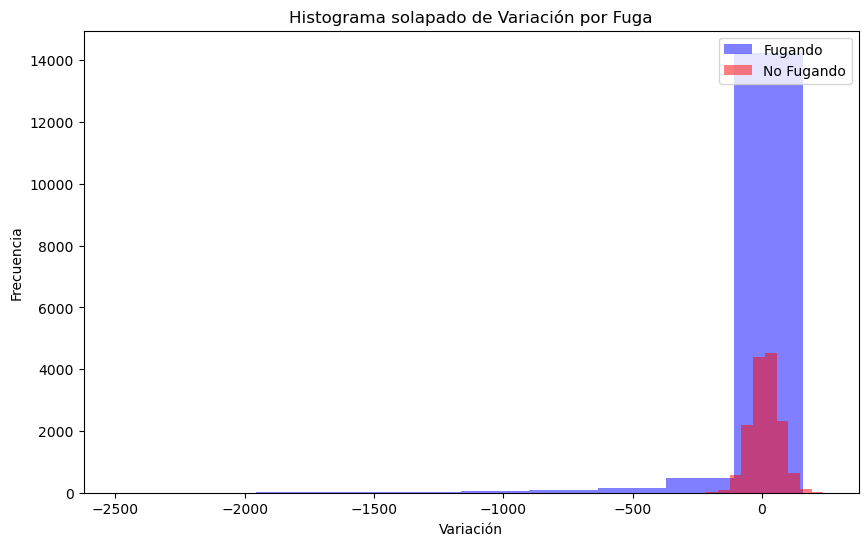

In [14]:
variacion_fuga_true = complete_train_data[complete_train_data['Fugando combustible'] == True]['Variacion']
variacion_fuga_false = complete_train_data[complete_train_data['Fugando combustible'] == False]['Variacion']

# Crear los histogramas solapados
plt.figure(figsize=(10, 6))

LAS_BINAS = 10

plt.hist(variacion_fuga_true, bins=LAS_BINAS, alpha=0.5, label='Fugando', color='blue')
plt.hist(variacion_fuga_false, bins=LAS_BINAS, alpha=0.5, label='No Fugando', color='red')

# Añadir título y etiquetas
plt.title('Histograma solapado de Variación por Fuga')
plt.xlabel('Variación')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

## Implementación de modelos

### Definición de métricas

In [15]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = real_first_leak_day
    while y_pred[pred_first_leak_day] != 1: pred_first_leak_day += 1

    return (pred_first_leak_day - real_first_leak_day)

In [16]:
def performance_metrics(y_true, y_pred, leak_value = 0.013) -> dict:
    return {
        # Valor de referencia
            'leak_value': leak_value,
        # Metricas clasicas de ML
            'accuracy_score':   accuracy_score(y_true, y_pred),
            'f1_score':         f1_score(y_true, y_pred),
            'recall_score':     recall_score(y_true, y_pred),
            'precision_score':  precision_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred),
        # Metricas propias del problema
            'false_positives':  confusion_matrix(y_true, y_pred).ravel()[1],
            'leak_delay':       leak_detection_delay(y_true, y_pred),
            'leak_loss':        leak_detection_delay(y_true, y_pred) * leak_value * 60 * 24 if type(leak_value) != str else None
    }

### Modelo primitivo

In [17]:
class TrivialClassifier:
    def __init__(self, n_bins = 10) -> None:
        self.n_bins = n_bins

    
    def fit(self, D_train) -> None:
        fuga_true = D_train[D_train['Fugando combustible'] == True]['Variacion']
        fuga_false = D_train[D_train['Fugando combustible'] == False]['Variacion']

        def hist_list(subset):
            subset_linspace = np.linspace(min(subset), max(subset), self.n_bins)
            interv_count = [[subset_linspace[i], subset_linspace[i + 1], 0] for i in range(len(subset_linspace) - 1)]
            for value in subset:
                for element in interv_count:
                    if element[0] <= value < element[1]:
                        element[2] += 1
            interv_count[0][0] = float('-inf')
            interv_count[-1][1] = float('inf')
            return interv_count

        self.fuga_true_intervc = hist_list(fuga_true)
        self.fuga_false_intervc = hist_list(fuga_false)


    def predict(self, X_test) -> None:
        y_pred = []

        def find_interval_value(interv_count, selected_value):
            for (lower_bound, upper_bound, value) in interv_count:
                if lower_bound <= selected_value < upper_bound:
                    return value

        for value in X_test:
            true_value = find_interval_value(self.fuga_true_intervc, value)
            false_value = find_interval_value(self.fuga_false_intervc, value)

            y_pred.append(1 if true_value > false_value else 0)
        
        return y_pred

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


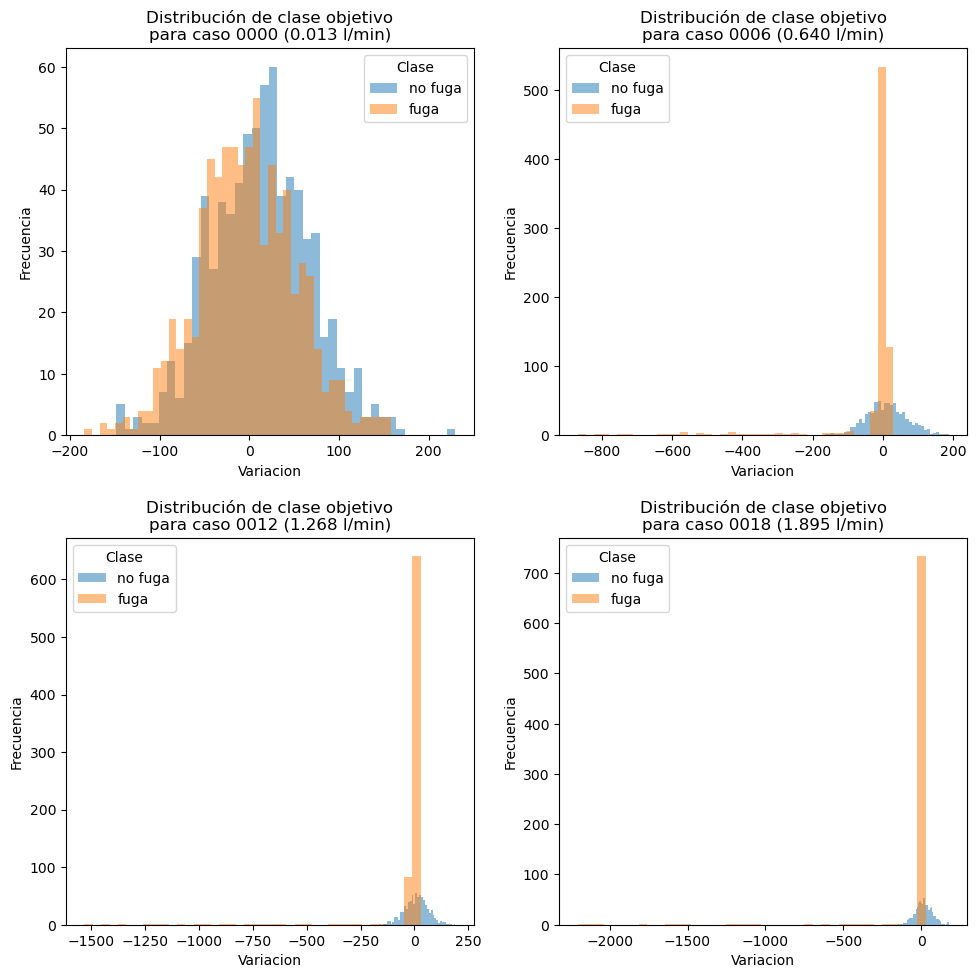

In [63]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))

for i, axi in enumerate(ax.ravel()):
    case_number = i * 6
    selected_sequence = data_dict[f'case_{case_number:04}']['train_dataframe']
    leak_value = data_dict[f'case_{case_number:04}']['leak_value']

    unique_values = selected_sequence['Fugando combustible'].unique()

    for value in unique_values:
        subset = selected_sequence[selected_sequence['Fugando combustible'] == value]
        axi.hist(subset['Variacion'], bins=40, alpha=0.5, label='fuga' if value == 1 else 'no fuga')

    axi.set_xlabel('Variacion')
    axi.set_ylabel('Frecuencia')
    axi.set_title(f'Distribución de clase objetivo\npara caso {case_number:04} ({leak_value:.3f} l/min)')
    axi.legend(title='Clase')

fig.tight_layout(pad=1.5)

plt.savefig('../../docs/media/histo_variacion.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


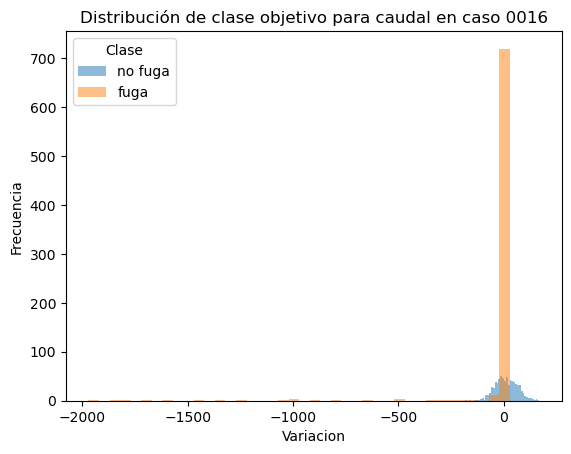

In [41]:
# Filtrar los datos por cada valor de B
case_number = 16

unique_values = data_dict[f'case_{case_number:04}']['train_dataframe']['Fugando combustible'].unique()

for value in unique_values:
    subset = data_dict[f'case_{case_number:04}']['train_dataframe'][data_dict[f'case_{case_number:04}']['train_dataframe']['Fugando combustible'] == value]
    plt.hist(subset['Variacion'], bins=40, alpha=0.5, label='fuga' if value == 1 else 'no fuga')

# Configurar el gráfico
plt.xlabel('Variacion')
plt.ylabel('Frecuencia')
plt.title(f'Distribución de clase objetivo para caudal en caso {case_number:04}')
plt.legend(title='Clase')

plt.savefig('../../docs/media/histo_mondongo.eps', format='eps')
plt.show()

In [ ]:
trv_model = TrivialClassifier(n_bins = 10)

trv_model.fit(complete_train_data)

y_pred = trv_model.predict(test_data[0][1]['Variacion'].to_list())

trv_results = [performance_metrics(test_data[0][1]['Fugando combustible'], y_pred, 'unknown')]
trv_seg_results = [
    performance_metrics(the_x[1]['Fugando combustible'], trv_model.predict(the_x[1]['Variacion']), the_x[0])
    for the_x in segmented_test_data
]

### Modelos clásicos

In [ ]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def train_classic_model(classifier_class, param_grid, train_data, cv = 5):
    param_pkl_path = f'{param_grids_path}/{classifier_class.__name__}.pkl'
    classifier = None
    X_train, y_train = train_data
    if os.path.exists(param_pkl_path):  # Param grid already known
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = classifier_class(**param_grid)
        classifier.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(
            estimator = classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train, y_train)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )
    return classifier

In [ ]:
def test_classic_model(classifier, test_list) -> list[dict]:
    results = list()
    for (leak_value, test_data) in test_list:
        X_test = test_data.drop(columns='Fugando combustible')
        y_test = test_data['Fugando combustible']
        y_pred = classifier.predict(X_test)
        results.append(performance_metrics(y_test, y_pred, leak_value))
    return results

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = train_classic_model(RandomForestClassifier, rf_param_grid, train_data)

rf_seg_results = test_classic_model(rf_model, segmented_test_data)
rf_results = test_classic_model(rf_model, test_data)

In [ ]:
rf_results

##### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb_model = train_classic_model(GaussianNB, gnb_param_grid, train_data)

gnb_seg_results = test_classic_model(gnb_model, segmented_test_data)
gnb_results = test_classic_model(gnb_model, test_data)

##### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = train_classic_model(KNeighborsClassifier, knn_param_grid, train_data)

knn_seg_results = test_classic_model(knn_model, segmented_test_data)
knn_results = test_classic_model(knn_model, test_data)

##### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = train_classic_model(XGBClassifier, xgb_param_grid, train_data)

xgb_seg_results = test_classic_model(xgb_model, segmented_test_data)
xgb_results = test_classic_model(xgb_model, test_data)

##### _Ensemble Classifier_

In [ ]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(
    estimators=[
        # NOTE: Podría ponerle los hiperparámetros ideales 
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

vot_model.fit(train_data[0], train_data[1])

vot_seg_results = test_classic_model(vot_model, segmented_test_data)
vot_results = test_classic_model(vot_model, test_data)

### Modelos _Deep Learning_

In [ ]:
def test_dl_model(model, test_list):
    result_list = []
    for leak_value, test_dataframe in test_list:
        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']
        
        y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

        result_list.append(performance_metrics(y_test, y_pred, leak_value))

    return result_list

#### Único modelo de _Deep Learning_

In [ ]:
X_train, y_train = train_data

##### Modelo unicapa

In [ ]:
unil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

unil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = unil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_unil_seg_results = test_dl_model(unil_model, segmented_test_data)
dl_unil_results = test_dl_model(unil_model, test_data)

##### Modelo multicapa

In [ ]:
multil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

multil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = multil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_multil_seg_results = test_dl_model(multil_model, segmented_test_data)
dl_multil_results = test_dl_model(multil_model, test_data)

#### Múltiples modelos de _Deep Learning_

In [ ]:
dl_multim_seg_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_seg_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

In [ ]:
dl_multim_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = test_data[0][0]

    X_test = test_data[0][1].drop(columns='Fugando combustible')
    y_test = test_data[0][1]['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

#### Modelo _ensemble_ de mini\_modelos de _Deep Learning_

In [ ]:
from scipy.stats import mode

class HomebrewEnsembleClassifier:
    def __init__(self, model_list) -> None:
        self.model_list = model_list
    
    def predict(self, X_input, verbose = 0) -> np.ndarray:
        prediction_list = [model.predict(X_input, verbose=verbose) for model in self.model_list]
        ensemble_predictions, _ = mode(prediction_list, axis=0)
        return ensemble_predictions.ravel()

In [ ]:
from tensorflow.keras.models import load_model

pkl_model_dir = '../../pkl/models'

model_list = [load_model(f'{pkl_model_dir}/{filename}') for filename in os.listdir(pkl_model_dir)]

dl_vot_model = HomebrewEnsembleClassifier(model_list)

In [ ]:
dl_vot_seg_results = test_dl_model(dl_vot_model, segmented_test_data)
dl_vot_results = test_dl_model(dl_vot_model, test_data)

## Visualización de resultados

### Tablas de resultados

In [ ]:
def display_result_table(results, name) -> None:
    df_chikito = pd.DataFrame.from_records(results).drop(columns='confusion_matrix')

    display(pd.DataFrame.from_records(results).drop(columns='confusion_matrix'))

    df_chikito.columns = [column.replace('_', '\\_') for column in df_chikito.columns]

    df_chikito.to_latex(
        f'../../docs/latex/{name.replace(" ", "_")}_table.tex',
        index = False,
        float_format = '%.4f'
    )

#### Trivial Classifier

In [ ]:
display_result_table(trv_seg_results, 'Trivial Classifier')

In [ ]:
display_result_table(trv_results, 'Trivial Classifier General')

#### _Random Forest Classifier_

In [ ]:
display_result_table(rf_seg_results, 'Random Forest')

In [ ]:
display_result_table(rf_results, 'Random Forest General')

#### _Naive Bayes Classifier_

In [ ]:
display_result_table(gnb_seg_results, 'Gaussian NB')

In [ ]:
display_result_table(gnb_results, 'Gaussian NB General')

#### _KNN Classifier_

In [ ]:
display_result_table(knn_seg_results, 'KNN')

In [ ]:
display_result_table(knn_results, 'KNN General')

#### _XGBoost Classifier_

In [ ]:
display_result_table(xgb_seg_results, 'XGBoost')

In [ ]:
display_result_table(xgb_results, 'XGBoost General')

#### _Ensemble Classifier_

In [ ]:
display_result_table(vot_seg_results, 'Ensemble')

In [ ]:
display_result_table(vot_results, 'Ensemble General')

#### Modelo DL unicapa

In [ ]:
display_result_table(dl_unil_seg_results, 'DL Unicapa')

In [ ]:
display_result_table(dl_unil_results, 'DL Unicapa General')

#### Modelo DL multicapa

In [ ]:
display_result_table(dl_multil_seg_results, 'DL Multicapa')

In [ ]:
display_result_table(dl_multil_results, 'DL Multicapa General')

#### Modelo DL multiple

In [ ]:
display_result_table(dl_multim_seg_results, 'DL Multimodelo')

In [ ]:
display_result_table(dl_multim_results, 'DL Multimodelo General')

#### Modelo DL _ensemble_

In [ ]:
display_result_table(dl_vot_seg_results, 'DL Ensemble')

In [ ]:
display_result_table(dl_vot_results, 'DL Ensemble General')

### Matrices de confusión

In [ ]:
def display_conf_matrix(confusion_matrix, name):
    disp = ConfusionMatrixDisplay(
        confusion_matrix,
        display_labels=['No fuga', 'Fuga']
    ).plot(colorbar=False)

    plt.title(f'Resultados de {name}', fontsize=14)

    plt.xlabel('Etiqueta Predicha', fontsize=12)
    plt.ylabel('Etiqueta Verdadera', fontsize=12)

    for text in disp.text_.ravel():
        text.set_fontsize(11)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(
        f'../../docs/media/cm_{name.replace(" ", "_")}.eps',
        format='eps'    
    )

#### Trivial Classifier

In [ ]:
display_conf_matrix(trv_results[0]['confusion_matrix'], 'Trivial Classifier')

#### _Random Forest Classifier_

In [ ]:
display_conf_matrix(rf_results[0]['confusion_matrix'], 'Random Forest')

#### _Gaussian NB Classifier_

In [ ]:
display_conf_matrix(gnb_results[0]['confusion_matrix'], 'Gaussian NB')

#### _KNN Classifier_

In [ ]:
display_conf_matrix(knn_results[0]['confusion_matrix'], 'KNN')

#### _XGBoost Classifier_

In [ ]:
display_conf_matrix(xgb_results[0]['confusion_matrix'], 'XGBoost')

#### _Ensemble Classifier_

In [ ]:
display_conf_matrix(vot_results[0]['confusion_matrix'], 'Ensemble')

#### Modelo DL unicapa

In [ ]:
display_conf_matrix(dl_unil_results[0]['confusion_matrix'], 'red unicapa')

#### Modelo DL multicapa

In [ ]:
display_conf_matrix(dl_multil_results[0]['confusion_matrix'], 'red multicapa')

#### Modelo DL _ensemble_

In [ ]:
display_conf_matrix(dl_vot_results[0]['confusion_matrix'], 'red ensemble')

### Otros

In [ ]:
display_seg_list = [
    ('Trivial Classifier',  trv_seg_results),
    ('Random Forest',       rf_seg_results),
    ('Gaussian NB',         gnb_seg_results),
    ('KNN',                 knn_seg_results),
    ('XGBoost',             xgb_seg_results),
    ('Ensemble',            vot_seg_results),
    ('LSTM unilayer',       dl_unil_seg_results),
    ('LSTM multilayer',     dl_multil_seg_results),
    ('LSTM ensemble',       dl_vot_seg_results)
]

In [ ]:
display_list = [
    ('Trivial Classifier',  trv_results)
    ('Random Forest',       rf_results),
    ('Gaussian NB',         gnb_results),
    ('KNN',                 knn_results),
    ('XGBoost',             xgb_results),
    ('Ensemble',            vot_results),
    ('DL unilayer',         dl_unil_results),
    ('DL multilayer',       dl_multil_results),
    ('DL ensemble',         dl_vot_results)
]

#### Comparativa de falsos positivos

In [ ]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['false_positives'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de falsos positivos según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Falsos positivos')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_falsos_positivos.eps', format='eps')

plt.show()

In [ ]:
for (name, results) in display_list:
    plt.bar(name, results[0]['false_positives'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de falsos positivos en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_falsos_positivos_g.eps', format='eps')

plt.show()

#### Comparativa de sensibilidad (_recall_)

In [ ]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['recall_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de sensibilidad (recall) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Sensibilidad (recall)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_recall.eps', format='eps')

plt.show()

In [ ]:
for (name, results) in display_list:
    plt.bar(name, results[0]['recall_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de sensibilidad (recall) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_recall_g.eps', format='eps')

plt.show()

#### Comparativa de exactitud (_accuracy_)

In [ ]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['accuracy_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de exactitud (accuracy) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Exactitud (accuracy)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_accuracy.eps', format='eps')

plt.show()

In [ ]:
for (name, results) in display_list:
    plt.bar(name, results[0]['accuracy_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de exactitud (accuracy) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_accuracy_g.eps', format='eps')

plt.show()

#### Comparativa de días hasta detección de fuga 

In [ ]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['leak_delay'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de retardo de detección según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Retardo (leak_delay)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_leak_delay.eps', format='eps')

plt.show()

In [ ]:
for (name, results) in display_list:
    plt.bar(name, results[0]['leak_delay'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de retardo de detección (leak_delay) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_leak_delay_g.eps', format='eps')

plt.show()